In [4]:
%matplotlib qt

# std
import os
from os import path
import time
import importlib

# 3p
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# prj
os.chdir("..")
from src import helpers, configuration, filtering, bandpower, plots, statistics as stats
from src.configuration import cfg
os.chdir('analysis-adelie')
#importlib.reload(src.statistics)

# ttest
from scipy.stats import ttest_ind

# plots
import matplotlib

font = {'family':'DejaVu Sans', 'weight':'normal', 'size':20}
matplotlib.rc('font', **font)

## Power spectral density: 1/f shape

In [3]:
len(df_baseline)/300

NameError: name 'df_baseline' is not defined

In [ ]:
len(df_meditation)/300

#### Welch's Periodogram all signal, AVG electrode

In [7]:
# Baseline Adélie
# Welch's Periodogram all signal, AVG electrode

df_baseline = helpers.load_signal_data('baseline', subject='adelie', config=cfg)
dsp_df_baseline = stats.get_dsp_welch(df_baseline, epoch_size='109s')

freqs = dsp_shape_baseline.index.get_level_values(1).astype(float)

plt.plot(freqs, dsp_df_baseline['AVG'])

plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectral power density (µV²/Hz)")
plt.title("Welch periodogram for AVG electrode, baseline, Adélie")
plt.show()

In [6]:
# Baseline Adélie
# Inverted shape of Welch's Periodogram all signal, AVG electrode

dsp_df_baseline = stats.get_dsp_welch(df_baseline, epoch_size='109s')
dsp_shape_baseline = 1 / dsp_df_baseline['AVG']

freqs = dsp_shape_baseline.index.get_level_values(1).astype(float)

# The best fit line over the actual values: slope and intercept
slopes_df = dsp_df_baseline.groupby(level=0).apply(
        lambda x: x.agg(lambda y: np.polyfit(x.index.get_level_values(1).astype(float), 1 / y, 1)[1]))

intercept_df = slopes_df = dsp_df_baseline.groupby(level=0).apply(
        lambda x: x.agg(lambda y: np.polyfit(x.index.get_level_values(1).astype(float), 1 / y, 1)[0]))

abline_values = [slopes_df['AVG'] * i + intercept_df['AVG'] for i in freqs]

# Plot the slope
plt.plot(freqs, abline_values)

# Plot the inverted shape
plt.plot(freqs, dsp_shape_baseline)

plt.title("Inverse of Welch periodogram for AVG electrode, baseline, Adélie")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Inverse of spectral power (Hz/µV²)')

Text(0, 0.5, 'Inverse of spectral power (Hz/µV²)')

In [17]:
# Meditation Adélie
# Welch's Periodogram all signal, AVG electrode

df_meditation = helpers.load_signal_data('meditation', subject='adelie', config=cfg)
dsp_df_meditation = stats.get_dsp_welch(df_meditation, epoch_size='287s')

freqs = dsp_shape_meditation.index.get_level_values(1).astype(float)

plt.plot(freqs, dsp_df_meditation['AVG'])

plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectral power density (µV²/Hz)")
plt.title("Welch periodogram for AVG electrode, meditation, Adélie")
plt.show()

In [16]:
# Meditation Adélie
# Inverted shape of Welch's Periodogram all signal, AVG electrode

dsp_df_meditation = stats.get_dsp_welch(df_meditation, epoch_size='287s')
dsp_shape_meditation = 1 / dsp_df_meditation['AVG']

# The best fit line over the actual values: slope and intercept
slopes_df = dsp_df_meditation.groupby(level=0).apply(
        lambda x: x.agg(lambda y: np.polyfit(x.index.get_level_values(1).astype(float), 1 / y, 1)[1]))

intercept_df = slopes_df = dsp_df_meditation.groupby(level=0).apply(
        lambda x: x.agg(lambda y: np.polyfit(x.index.get_level_values(1).astype(float), 1 / y, 1)[0]))

abline_values = [slopes_df['AVG'] * i + intercept_df['AVG'] for i in freqs]

# Plot the slope
plt.plot(freqs, abline_values)

# Plot the inverted shape
plt.plot(freqs, dsp_shape_meditation)

plt.title("Inverse of Welch periodogram for AVG electrode, meditation, Adélie")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Inverse of spectral power (Hz/µV²)')

Text(0, 0.5, 'Inverse of spectral power (Hz/µV²)')

#### Welch's Periodogram for one epoch, all electrodes+AVG

In [141]:
# Baseline Adélie
# Welch's Periodogram for one epoch, all electrodes+AVG

df_baseline = helpers.load_signal_data('baseline', subject='adelie', config=cfg)['60s':'70s']
plot_dsp_df_baseline = stats.plot_dsp(df_baseline, title="Welch periodogram for all electrodes, one epoch, baseline, Adélie")

No handles with labels found to put in legend.


In [155]:
dsp_db_baseline = stats.get_dsp_welch(df_baseline)
dsp_shape_baseline = 1 / dsp_db_baseline['AVG']
plt.plot(dsp_shape_baseline.index.get_level_values(1).astype(float), dsp_shape_baseline)

plt.title("Inverse of Welch periodogram for AVG electrode, one epoch, baseline, Adélie")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Inverse of spectral power (Hz/µV²)')

Text(0, 0.5, 'Inverse of spectral power (Hz/µV²)')

No handles with labels found to put in legend.


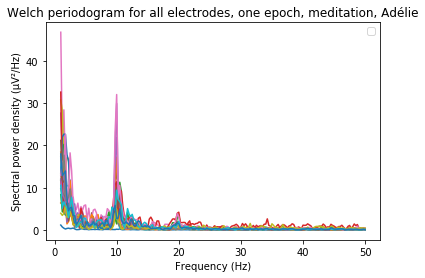

In [39]:
# Meditation Adélie
# Welch's Periodogram for one epoch, all electrodes+AVG

df_meditation = helpers.load_signal_data('meditation', subject='adelie', config=cfg)['60s':'70s']
dsp_db_meditation = stats.plot_dsp(df_meditation, title="Welch periodogram for all electrodes, one epoch, meditation, Adélie")

In [95]:
dsp_db_meditation = stats.get_dsp_welch(df_meditation)
dsp_shape_meditation = 1 / dsp_db_meditation['AVG']
plt.plot(dsp_shape_meditation.index.get_level_values(1).astype(float), dsp_shape_meditation)

plt.title("Inverse of Welch periodogram for AVG electrode, one epoch, meditation, Adélie")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Inverse of spectral power (Hz/µV²)')

Text(0, 0.5, 'Inverse of spectral power (Hz/µV²)')

## Adélie: signal in electrodes, slopes, FWER corrected ttest

In [2]:
def get_concat_signal(data_type, subject="adelie", config=cfg):
    dfs = [
        helpers.load_signal_data(data_type, subject=subject, recording=recording, config=config)
        for recording in range(
            len(config["paths"]["subjects"][subject]["recordings"][data_type])
        )
    ]

    for i in range(len(dfs) - 1):
        dfs[i + 1].index += dfs[i].index.max()

    concatenated = pd.concat(dfs)
    return concatenated

In [24]:
# get baseline Adélie
baseline_adelie = get_concat_signal('baseline')
baseline_adelie_slopes = stats.get_slopes(baseline_adelie)

# get meditation Adélie
meditation_adelie = get_concat_signal('meditation')
meditation_adelie_slopes = stats.get_slopes(meditation_adelie)

In [4]:
baseline_adelie_slopes['AVG']

00:00:09.991072    -0.667733
00:00:19.991072    -3.961399
00:00:29.991072    -5.481510
00:00:39.991072    -6.538597
00:00:49.991072    -4.760911
00:00:59.991072     0.208992
00:01:09.991072   -11.282976
00:01:19.991072    -9.350653
00:01:29.991072   -14.186080
00:01:39.991072   -13.397304
00:01:49.991072    -9.370533
00:02:09.991072     0.166913
00:02:19.991072    -3.321799
00:02:29.991072    -1.236555
00:02:39.991072    -3.996468
00:02:49.991072    -1.597674
00:02:59.991072    -6.528478
00:03:09.991072     1.585980
00:03:19.991072    -7.898446
00:03:29.991072    -7.209998
00:03:39.991072    -8.327862
00:03:49.991072    -7.263258
00:03:59.991072    -8.759649
00:04:09.991072   -12.008338
Name: AVG, dtype: float64

In [5]:
# ttest in one electrode
ttest_adelie_slopes_one_elec = ttest_ind(baseline_adelie_slopes['AVG'], meditation_adelie_slopes['AVG'], equal_var=False, nan_policy='omit')

In [6]:
# ttest over all electrodes
concat_adelie_slopes = pd.concat([baseline_adelie_slopes, meditation_adelie_slopes], keys=['baseline', 'meditation'])
ttest_adelie_slopes = concat_adelie_slopes.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))
ttest_adelie_slopes

A2        (2.0708290434930077, 0.04395410334413038)
AVG       (2.1401052881461444, 0.03715834725940226)
C3       (6.422218714461014, 3.706001581630307e-08)
C4       (7.412828844727923, 1.241603939300971e-10)
Cz       (2.7619767913825513, 0.008456831248757693)
F3      (5.566991287227238, 1.7256214062681937e-06)
F4      (3.3842447792197445, 0.0014164527660813619)
F7      (3.6728327044743727, 0.0008082831243199394)
F8       (5.211733121413251, 3.349288020752859e-06)
Fp1     (4.444673710057724, 4.0495667907126346e-05)
Fp2     (4.817307688997888, 1.0590188744718458e-05)
Fz       (3.675020920789002, 0.0006784939148706701)
O1      (-2.9241951174351817, 0.006694852132093662)
O2     (-4.409455056260436, 0.00012480027231539424)
P3       (2.8178372151582884, 0.008057328383139639)
P4        (1.6865458563186744, 0.10001551830102653)
Pz        (1.5055670044508684, 0.14017857773875772)
T3        (5.86176808842824, 1.811827381038714e-07)
T4      (4.139481641422178, 0.00011650200416737314)
T5        (1

In [12]:
# FWER corrected ttest: ttest over 20 electrodes
FWER_threshold = 0.05 / 20
p_values_adelie_slopes = ttest_adelie_slopes.map(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to CSV
p_values_adelie_slopes[p_values_adelie_slopes < FWER_threshold].to_csv('p_values_adelie_slopes.csv')
print('The significant pvalues are', p_values_adelie_slopes[p_values_adelie_slopes < FWER_threshold])

The FWER corrected pvalue is 0.0025
The significant pvalues are C3     3.706002e-08
C4     1.241604e-10
F3     1.725621e-06
F4     1.416453e-03
F7     8.082831e-04
F8     3.349288e-06
Fp1    4.049567e-05
Fp2    1.059019e-05
Fz     6.784939e-04
O2     1.248003e-04
T3     1.811827e-07
T4     1.165020e-04
dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


## Sam: signal in electrodes, slopes, FWER corrected ttest

In [8]:
# get baseline Sam
baseline_sam = get_concat_signal('baseline', subject='sam')
baseline_sam_slopes = stats.get_slopes(baseline_sam)

# get meditation Sam
meditation_sam = get_concat_signal('meditation', subject='sam')
meditation_sam_slopes = stats.get_slopes(meditation_sam)

In [9]:
# ttest over all electrodes
concat_sam_slopes = pd.concat([baseline_sam_slopes, meditation_sam_slopes], keys=['baseline', 'meditation'])
ttest_sam_slopes = concat_sam_slopes.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))
ttest_sam_slopes

A2       (1.7201074192238588, 0.09032824194771415)
AVG      (-1.2245138320548736, 0.2239094015388643)
C3       (0.44739912635232815, 0.6565870030998138)
C4      (-2.4071179850463063, 0.02146739108615762)
Cz        (0.9712772386273426, 0.3367708254680738)
F3      (-0.04040780441038075, 0.9679640332326621)
F4        (0.10075065927544102, 0.920246216994105)
F7        (0.6855897043397738, 0.4957657866574977)
F8        (0.8609906798668581, 0.3929732696973859)
Fp1        (0.356266429634935, 0.7223338029322023)
Fp2       (0.5639355433534204, 0.5738827685593988)
Fz       (1.2395066372745527, 0.22100838337876338)
O1        (1.0582459140570586, 0.2930594530078005)
O2      (-3.000774079818139, 0.003918635172057687)
P3        (1.3938262428673474, 0.1698477431776885)
P4        (-1.372653548237639, 0.1765335044720073)
Pz       (1.0835812211395435, 0.28294300064892025)
T3      (-2.622777362620294, 0.010021462829728255)
T4     (-3.3875999383020243, 0.001711141974884166)
T5        (0.3114523518769105, 

In [11]:
# FWER corrected ttest: ttest over 20 electrodes
FWER_threshold = 0.05 / 20
p_values_sam_slopes = ttest_sam_slopes.map(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to CSV
p_values_sam_slopes[p_values_sam_slopes < FWER_threshold].to_csv('p_values_sam_slopes.csv')
print('The significant pvalues are', p_values_sam_slopes[p_values_sam_slopes < FWER_threshold])

The FWER corrected pvalue is 0.0025
The significant pvalues are T4    0.001711
T6    0.001839
dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


## Let's animate the welch periodogram

In [37]:
psd = stats.get_dsp_welch(helpers.load_signal_data("baseline", config=cfg, subject='adelie'), epoch_size='4s')
psd.head()

A2        AVG         C3         C4         Cz  \
00:00:09.991072 1.00  0.960440   1.932948   3.906442   5.060188  49.360073   
                1.25  0.415009  34.300112  39.477347  24.689440  63.970273   
                1.50  0.047441  25.411044  44.744947  21.280163  28.262125   
                1.75  0.159956   0.810664   0.817227   2.207108   0.823415   
                2.00  0.139585   2.277048  13.786360   3.677157   5.266234   

                             F3          F4         F7         F8        Fp1  \
00:00:09.991072 1.00  11.564177   22.241432  12.904437   6.548312  14.855838   
                1.25  51.757166  133.702267  96.689173  58.299157  75.454290   
                1.50  19.414765  129.597375  44.694218  37.682253  43.733517   
                1.75   3.468835   64.260621   3.695244   0.574181   3.871877   
                2.00   4.712729    9.420356   3.883453   0.232989   1.245614   

                      ...         Fz         O1         O2         P3  \
00:00:09.991072 1.00  ...   5.954402   1.072496  27.032049  40.424704   
                1.25  ...  46.087190  10.594399  48.347180  28.851662   
                1.50  ...  39.977972  15.703335  34.241434  13.336551   
                1.75  ...   3.454433   4.476083  31.775274   1.658809   
                2.00  ...   4.135805   6.911569   8.245376   6.253878   

                             P4          Pz         T3         T4         T5  \
00:00:09.991072 1.00  28.324630   78.110312   8.545232   1.019636   9.807025   
                1.25  48.916572   86.046643  11.508428  10.190834  23.268254   
                1.50  22.339054  140.022706   2.325799   6.635201  30.655105   
                1.75   7.157585   36.748422   0.869467   1.804938   3.066903   
                2.00   6.657723    7.257102   0.458657   8.424098  12.181189   

                             T6  
00:00:09.991072 1.00  22.421323  
                1.25  67.858778  
                1.50  53.243323  
                1.75   5.125031  
                2.00   2.252611  

[5 rows x 21 columns]

In [77]:
psd.index.levels[0]

TimedeltaIndex(['00:00:09.991072', '00:00:13.991072', '00:00:17.991072',
                '00:00:21.991072', '00:00:25.991072', '00:00:29.991072',
                '00:00:33.991072', '00:00:37.991072', '00:00:41.991072',
                '00:00:45.991072', '00:00:49.991072', '00:00:53.991072',
                '00:00:57.991072', '00:01:01.991072', '00:01:05.991072',
                '00:01:09.991072', '00:01:13.991072', '00:01:17.991072',
                '00:01:21.991072', '00:01:25.991072', '00:01:29.991072',
                '00:01:33.991072', '00:01:37.991072', '00:01:41.991072',
                '00:01:45.991072', '00:01:49.991072', '00:01:53.991072',
                '00:01:57.991072'],
               dtype='timedelta64[ns]', freq='4S')

In [89]:
import matplotlib.animation as animation
    
fig = plt.figure()

def animate(group_index):
    plt.clf()
    group = psd.xs(group_index, level=0)
    axes = group['AVG'].plot()
    axes.set_ylim([0,100])
    return axes


anim = animation.FuncAnimation(fig, animate, frames=psd.index.levels[0], repeat = False, interval=300, blit=False)